# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_df = pd.DataFrame()
number = 1
temp =[]
humidity = []
cloudiness = []
wind_speed = []
names = []
for city in cities:
    try:
        base_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
        response = requests.get(base_url).json()
        name = response["name"]
        names.append(response["name"])
        temp.append(response["main"]["temp"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Current City is #{number} and its name is {name}")
        number += 1
        
    except:
        print("City not found; skipping record")


Current City is #1 and its name is Tabou
Current City is #2 and its name is Ribeira Grande
Current City is #3 and its name is Hermanus
Current City is #4 and its name is Saint George
Current City is #5 and its name is Saskylakh
Current City is #6 and its name is Rikitea
Current City is #7 and its name is Atuona
Current City is #8 and its name is Gizo Government Station
Current City is #9 and its name is Hobart
City not found; skipping record
Current City is #10 and its name is Amurzet
Current City is #11 and its name is Ancud
Current City is #12 and its name is Honningsvåg
Current City is #13 and its name is Mataura
Current City is #14 and its name is Fort Nelson
Current City is #15 and its name is Torbay
Current City is #16 and its name is Airai
Current City is #17 and its name is Punta Arenas
Current City is #18 and its name is Tura
Current City is #19 and its name is Tuktoyaktuk
Current City is #20 and its name is Qaanaaq
Current City is #21 and its name is Pārvatipuram
Current City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df["City"] = names
city_df["Temp(F)"] = temp
city_df["Cloudiness"] = cloudiness
city_df["Humidity"] = humidity
city_df["Wind Speed (mph)"] = wind_speed
city_df["Latitude"] = lats[:len(names)]
city_df.to_csv("city.csv")
city_df

,City,Temp(F),Cloudiness,Humidity,Wind Speed (mph),Latitude
0,Tabou,75.02,98,91,5.41,3.184052
1,Ribeira Grande,71.38,88,84,13.47,25.333972
2,Hermanus,47.80,1,75,3.15,-69.283130
3,Saint George,76.78,0,27,8.05,33.970423
4,Saskylakh,22.51,99,92,19.17,73.152886
...,...,...,...,...,...,...
570,West Wendover,61.81,0,34,0.00,-21.831108
571,San Angelo,71.65,100,44,4.61,17.579301
572,São Filipe,78.69,53,84,5.14,3.056941
573,San Andrés,78.82,75,94,6.91,49.400821


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_df = city_df[city_df["Humidity"] < 100]
clean_city_df

,City,Temp(F),Cloudiness,Humidity,Wind Speed (mph),Latitude
0,Tabou,75.02,98,91,5.41,3.184052
1,Ribeira Grande,71.38,88,84,13.47,25.333972
2,Hermanus,47.80,1,75,3.15,-69.283130
3,Saint George,76.78,0,27,8.05,33.970423
4,Saskylakh,22.51,99,92,19.17,73.152886
...,...,...,...,...,...,...
570,West Wendover,61.81,0,34,0.00,-21.831108
571,San Angelo,71.65,100,44,4.61,17.579301
572,São Filipe,78.69,53,84,5.14,3.056941
573,San Andrés,78.82,75,94,6.91,49.400821


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

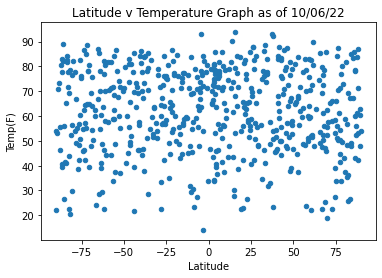

In [9]:
clean_city_df.plot.scatter( x = "Latitude", y = "Temp(F)", title = "Latitude v Temperature Graph as of 10/06/22")
plt.savefig("Graphs/Latitude_vs_Temperature")

## Latitude vs Temperature
This graph analyzes how temperature maximums varies with latitude. From the data temperature maxes tend to cluster towards the upper temperatures since by definition they are maximums. Something of note is that there are more cities clustered at latitudes 75 or -75 that are on the lower end of the Temperature scale and that oddly enough there is one city near the equator that has a temperature maximum of below 20 degrees.

## Latitude vs. Humidity Plot

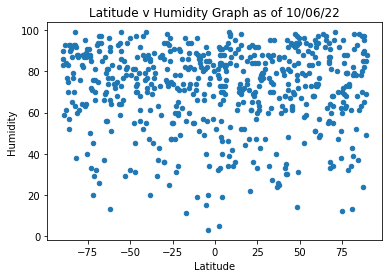

In [10]:
clean_city_df.plot.scatter( x = "Latitude", y = "Humidity", title = "Latitude v Humidity Graph as of 10/06/22")
plt.savefig("Graphs/Latitude_vs_Humidity")

## Latitude vs Humidity
This scatter plot is analyzing the humidity levels of cities with varying latitudes. Humidity seems relatively well distributed in the 60-99 range with only a small number of the total cities falling below the 60 humidity index.

## Latitude vs. Cloudiness Plot

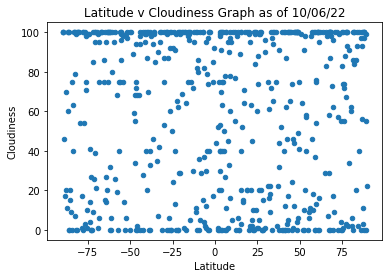

In [11]:
clean_city_df.plot.scatter( x = "Latitude", y = "Cloudiness", title = "Latitude v Cloudiness Graph as of 10/06/22")
plt.savefig("Graphs/Latitude_vs_Cloudiness")

## Latitude vs Cloudiness
This graph is much different than the previous graphs as cloudiness on a given day is not really a continuous value. There seems to be more cities with overcast skies with cloudiness value 100 rather than cities with clear skies at cloudiness value 0. 

## Latitude vs. Wind Speed Plot

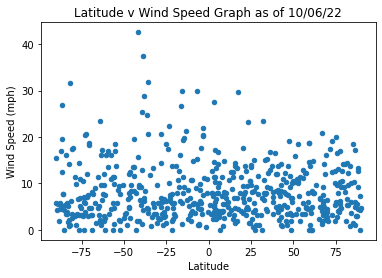

In [13]:
clean_city_df.plot.scatter( x = "Latitude", y = "Wind Speed (mph)", title = "Latitude v Wind Speed Graph as of 10/06/22")
plt.savefig("Graphs/Latitude_vs_Wind_Speed")

## Latitude vs Wind Speed
This graph makes sense considering most cities should not have wind speeds over 15 mph on a given day. The cities with varying latitudes all trend towards being within the 0-15 mph wind speed range with very few outliers being above that. 

## Linear Regression

In [14]:
#Separating Northern/Souther Hemisphers
north_lat_df = clean_city_df[clean_city_df["Latitude"] > 0]
south_lat_df = clean_city_df[clean_city_df["Latitude"] < 0]


####  Northern Hemisphere - Temp vs. Latitude Linear Regression

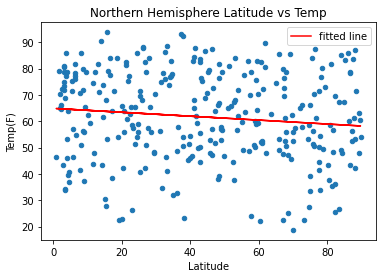

In [15]:
north_lat_temp = linregress(north_lat_df["Latitude"],north_lat_df["Temp(F)"])
north_lat_df.plot.scatter(x ="Latitude", y = "Temp(F)", title = "Northern Hemisphere Latitude vs Temp")
plt.plot(north_lat_df["Latitude"], north_lat_temp.intercept + north_lat_temp.slope*north_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Northern_Latitude_vs_Temperature")

## Northern Hemisphere Temperature Max
Temperature is pretty well distributed but has more data points above the 60 degree Fahrenheit fitted line for the northern Hemisphere. The fitted line has a slight decline when moving away from the equator reinforcing our statement that temperature increases as we go towards the equator.

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

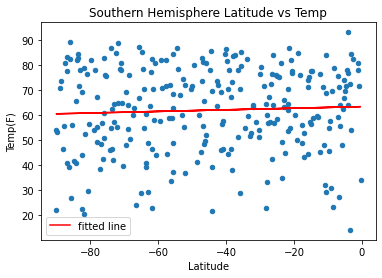

In [16]:
south_lat_temp = linregress(south_lat_df["Latitude"],south_lat_df["Temp(F)"])
south_lat_df.plot.scatter(x ="Latitude", y = "Temp(F)", title = "Southern Hemisphere Latitude vs Temp")
plt.plot(south_lat_df["Latitude"], south_lat_temp.intercept + south_lat_temp.slope*south_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Southern_Latitude_vs_Temperature")


## Southern Hemisphere Temperature
As the latitude gets closer to the equator, the temperature slightly increases. This reinforces the idea that temperatures are hotter near the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

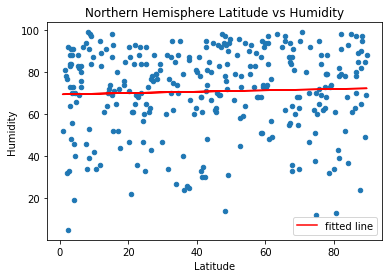

In [17]:
north_lat_humidity  = linregress(north_lat_df["Latitude"],north_lat_df["Humidity"])
north_lat_df.plot.scatter(x ="Latitude", y = "Humidity", title = "Northern Hemisphere Latitude vs Humidity")
plt.plot(north_lat_df["Latitude"], north_lat_humidity.intercept + north_lat_humidity.slope*north_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Northern_Latitude_vs_Humidity")

## Northern Hemisphere Humidity
Northern Hemisphere cities tend to have more humid days rather than not. The data points are more spread out compared to southern hemisphere cities. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

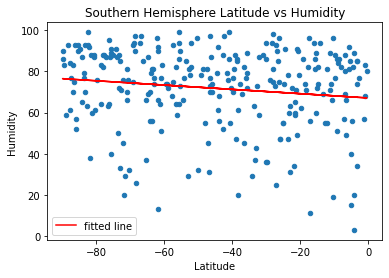

In [18]:
south_lat_humidity  = linregress(south_lat_df["Latitude"],south_lat_df["Humidity"])
south_lat_df.plot.scatter(x ="Latitude", y = "Humidity", title = "Southern Hemisphere Latitude vs Humidity")
plt.plot(south_lat_df["Latitude"], south_lat_humidity.intercept + south_lat_humidity.slope*south_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Southern_Latitude_vs_Humidity")

## Southern Hemisphere Humidity
Southern Hemisphere cities tend to have a higher humidity. More data points are located above the 70 Humidity Index according to the fitted line that was calculated using linear regression. As the latitude gets closer to the equator, the humidity tends to decreases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

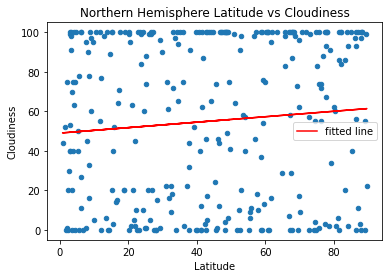

In [19]:
north_lat_cloud  = linregress(north_lat_df["Latitude"],north_lat_df["Cloudiness"])
north_lat_df.plot.scatter(x ="Latitude", y = "Cloudiness", title = "Northern Hemisphere Latitude vs Cloudiness")
plt.plot(north_lat_df["Latitude"], north_lat_cloud.intercept + north_lat_cloud.slope*north_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Northern_Latitude_vs_Cloudiness")

## Northern Hemisphere Cloudiness
The Northern Hemisphere is almost directly split 60/40 with more data points being in the higher cloudiness index. As the latitude increases, cloudiness also increases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

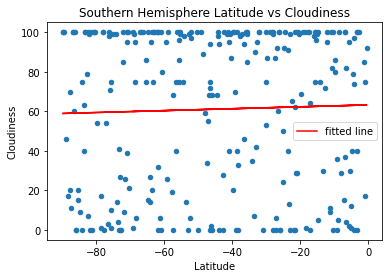

In [20]:
south_lat_cloud  = linregress(south_lat_df["Latitude"],south_lat_df["Cloudiness"])
south_lat_df.plot.scatter(x ="Latitude", y = "Cloudiness", title = "Southern Hemisphere Latitude vs Cloudiness")
plt.plot(south_lat_df["Latitude"], south_lat_cloud.intercept + south_lat_cloud.slope*south_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Southern_Latitude_vs_Cloudiness")

## Southern Hemisphere CLoudiness
As with the original data set, there's no real pattern to the distribution of cloudiness. This is reflected in the fitted line that basically splits the graph into a 60/40 split favoring the higher cloudiness indexes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

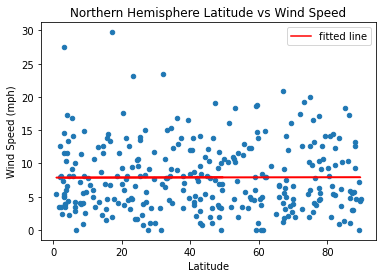

In [21]:
north_lat_wind = linregress(north_lat_df["Latitude"],north_lat_df["Wind Speed (mph)"])
north_lat_df.plot.scatter(x ="Latitude", y = "Wind Speed (mph)", title = "Northern Hemisphere Latitude vs Wind Speed")
plt.plot(north_lat_df["Latitude"], north_lat_wind.intercept + north_lat_wind.slope*north_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Northern_Latitude_vs_Wind_Speed")


## Northern Hemisphere Wind Speed 
Data graphs northern hemisphere cities vs wind speed. Fitted line shows that most cities lie beneath 10 mph wind speeds with almost no decline/incline of slope. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

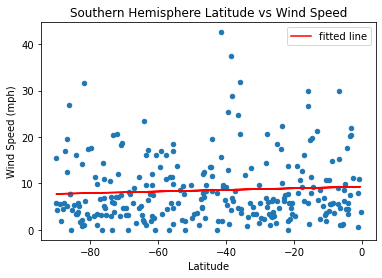

In [22]:
south_lat_wind = linregress(south_lat_df["Latitude"],south_lat_df["Wind Speed (mph)"])
south_lat_df.plot.scatter(x ="Latitude", y = "Wind Speed (mph)", title = "Southern Hemisphere Latitude vs Wind Speed")
plt.plot(south_lat_df["Latitude"], south_lat_wind.intercept + south_lat_wind.slope*south_lat_df["Latitude"], 'r', label='fitted line')
plt.legend()
plt.savefig("Graphs/Southern_Latitude_vs_Wind_Speed")

## Southern Hemisphere Latitude vs Wind Speed
Southern Hemisphere cities and the wind speeds of those cities. The fitted line states that most of the data points lie below the 10 MPH mark. There's only the slightest increase of slope as latitudes get closer to the equator at the 0 latitude mark. 